--------------------------
<FONT SIZE=6 COLOR=ROYALBLUE >DEEP LEARNING PROJECT

<font color=cornflowerblue>(TechNest Task 2 : Fake and Real news dataset)

---------------------


ISOT Fake News detection dataset (binary text classification)

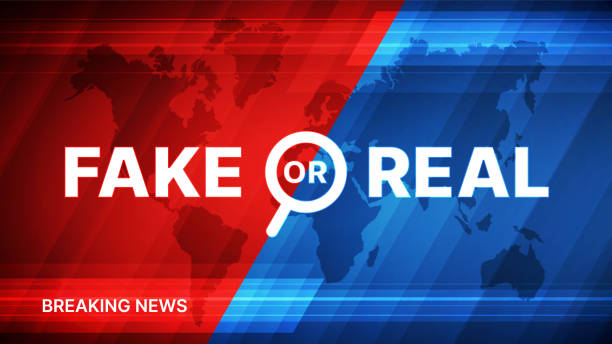

<font color=lightseagreen>To get the dataset : [Here you go !](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset/data)

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Import both Dataset
df_fake = pd.read_csv('/content/Fake.csv', engine='python')
df_true = pd.read_csv('/content/True.csv', engine='python')
df_fake['label'] = 1
df_true['label'] = 0

ParserError: unexpected end of data